# Image Restoration with scikit-image

In my collection of family pictures I have some very old ones that have been partially destroyed.
It is especially unfortunate, when the damage occurs on faces. 

I'll use the `inpaint_biharmonic`function from *skimage.restoration* module in *scikit-image* library to restore the destroyed parts of the face of my uncle Max. This photo was taken in England in 1946 and stuck in a damp drawer with old family correspondence for decades.


In [1]:
from numpy import asarray
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from skimage.restoration import inpaint

In [13]:
# load and show an image using Pillow
defect_image_src = 'MaxKent_defect.jpg'

# load the image with PIL
defect_image = Image.open(defect_image_src)

# summarize some details about the image
print("Defect image format: " + defect_image.format) # format from PIL
print("Defect image mode: " + defect_image.mode) # mode from PIL
print(f"Defect image size: {defect_image.size[0]} x {defect_image.size[1]}") # size from PiL
print("\nMax Kent, 1946")

# show the image
# defect_image.show() # shows in a separate window
#defect_image # shows in the notebook

Defect image format: JPEG
Defect image mode: RGB
Defect image size: 1320 x 1771

Max Kent, 1946


Defect image type: uint8
Defect image shape: 1771 x 1320


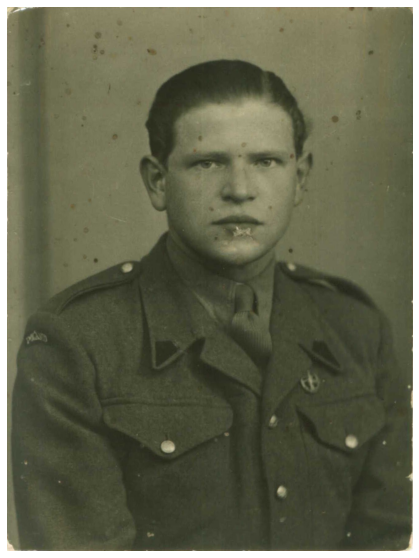

In [14]:
# load and display an image with Matplotlib

# load image as pixel array
defect_img = plt.imread(defect_image_src)

# summarize shape of the pixel array
print("Defect image type: " + str(defect_img.dtype))
print(f"Defect image shape: {defect_img.shape[0]} x {defect_img.shape[1]}")

# display the array of pixels as an image
plt.figure(figsize = (20,10))
plt.imshow(defect_img)
plt.axis('off')
plt.show()

### Use plotly to define areas to restore


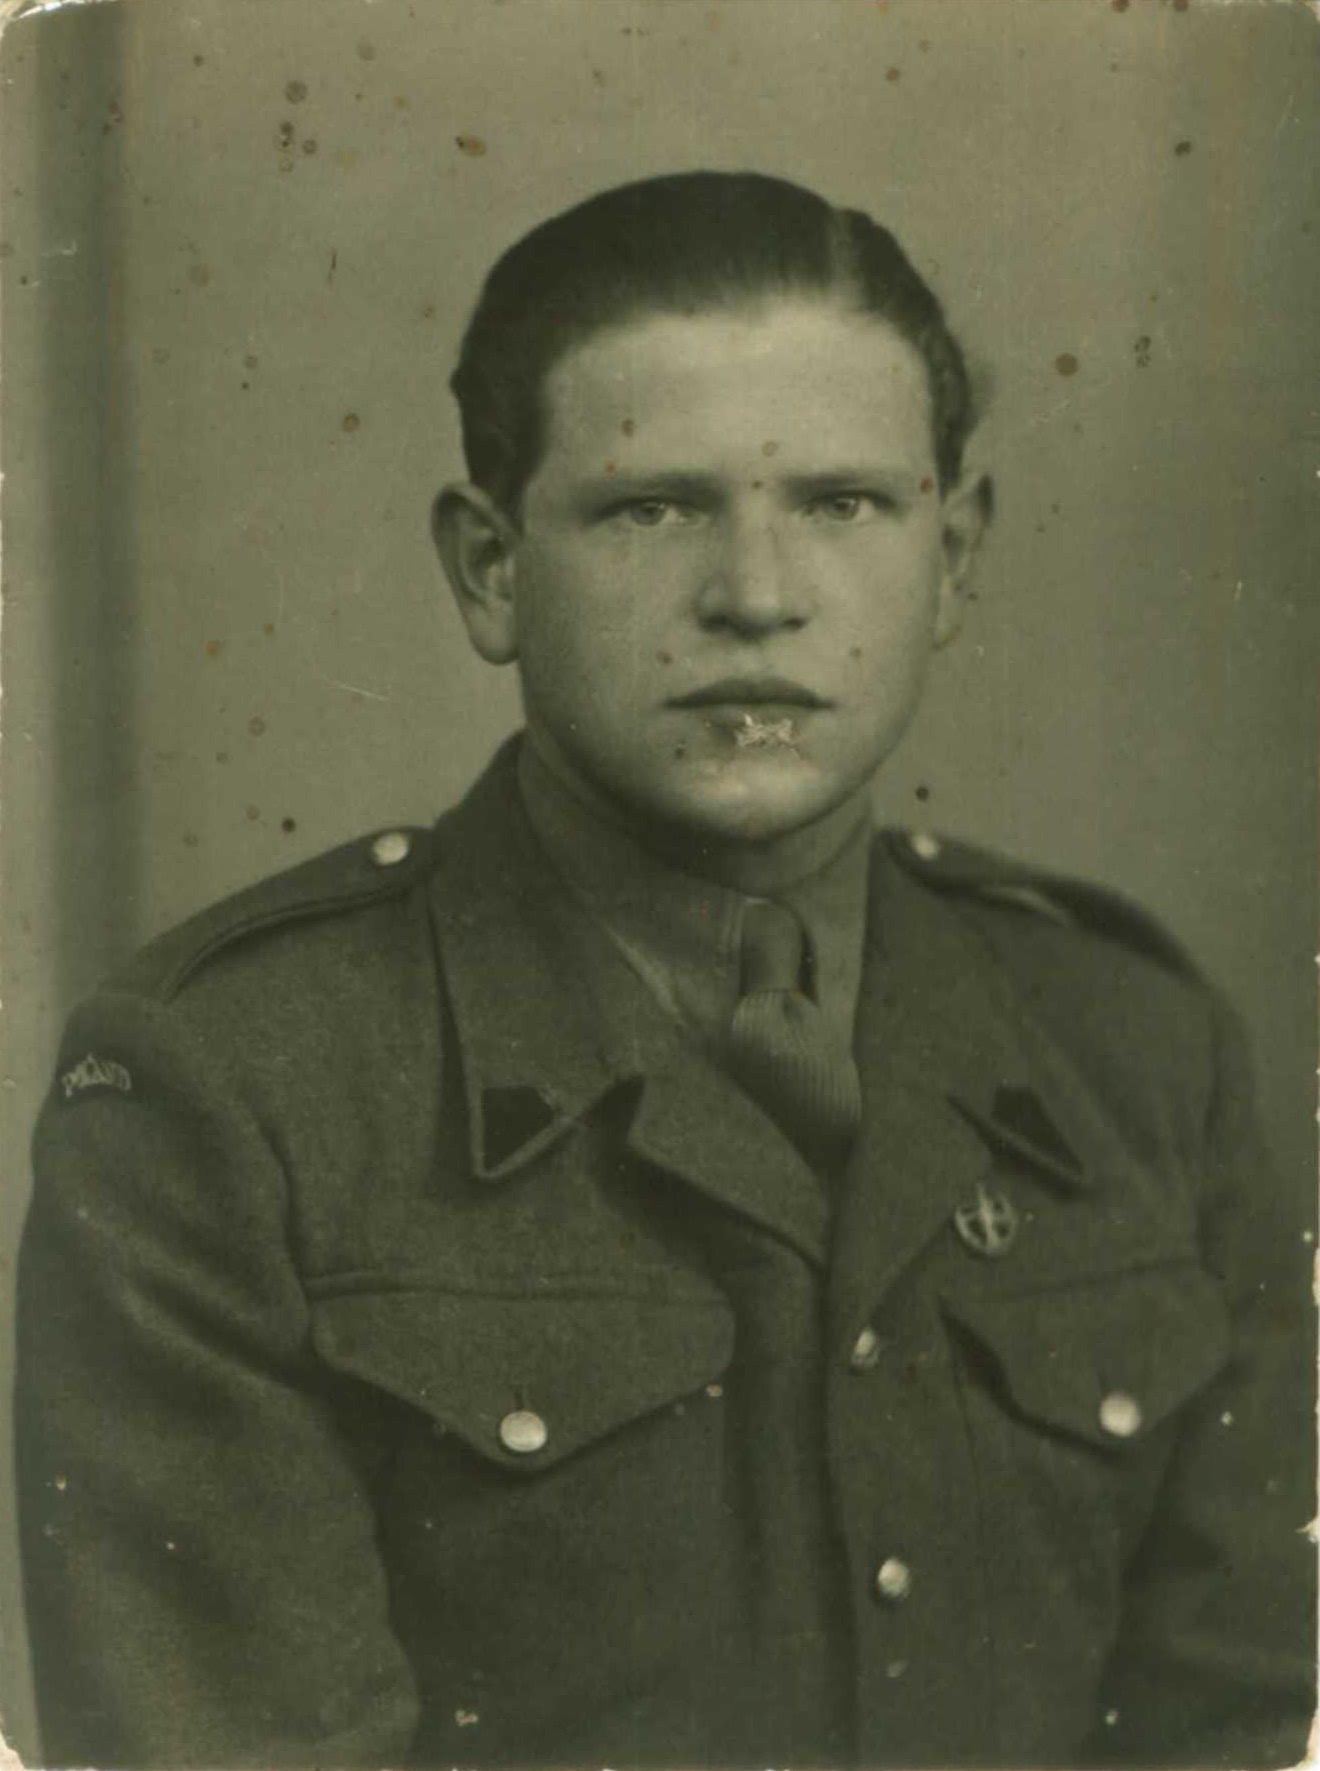

In [15]:
# alternatively use skimage
from skimage import io
img = io.imread('MaxKent_defect.jpg')
fig = px.imshow(img, width=1000, height=1300)
fig.show()

## Create a mask with defect region(s)

In [327]:
# Create mask
def get_mask(image):
    '''Creates mask with defect regions'''
    mask = np.zeros(image.shape[:-1]) # takes only first 2 values, without the number of channels
    
    # chose a range of pixels to restore
    # lips
    mask[710:745, 720:800] = 1
    mask[737:748, 715:760] = 1
    mask[730:760, 670:696] = 1
    
    mask[635:679, 645:685] = 1
    mask[640:665, 845:872] = 1
    mask[433:462, 757:787] = 1
    mask[473:494, 748:767] = 1
    mask[470:500, 915:939] = 1
    mask[411:442, 617:642] = 1
    mask[453:475, 603:625] = 1
    #mask[760:800, 665:768] = 1
    
    return mask

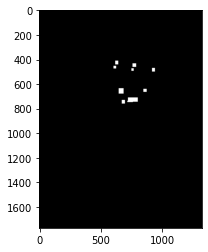

In [328]:
# Obtain the mask
mask = get_mask(defect_img)
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
plt.show()

In [329]:
defect_img.shape[:-1]

(1771, 1320)

### Apply the restoration function `inpaint.inpaint_biharmonic` from `skimage.restoration`

In [330]:
# Apply the restoration function to the image using the mask
restored_image = inpaint.inpaint_biharmonic(defect_img, mask, multichannel=True)

Text(0.5, 1.0, 'Restored face')

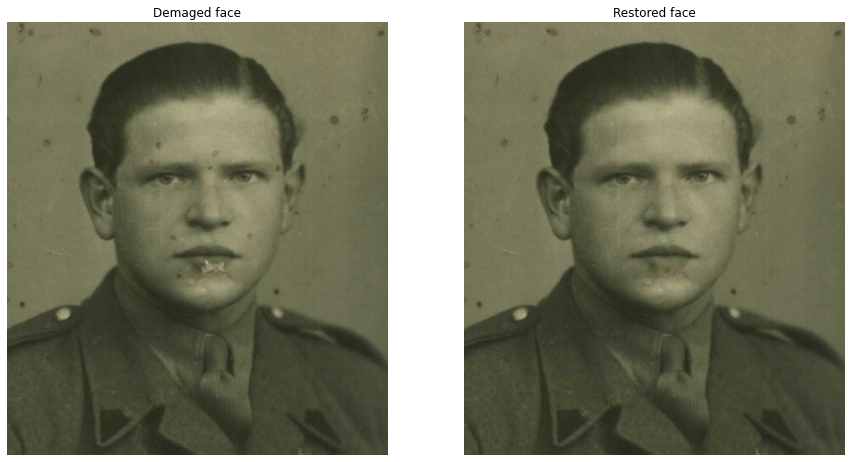

In [337]:
fig = plt.figure(figsize=(15, 10))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(defect_img)
plt.xlim([250, 1200])
plt.ylim([1200, 120])
plt.axis('off')
plt.title("Demaged face")
  
fig.add_subplot(rows, columns, 2)
plt.imshow(restored_image)
plt.xlim([250, 1200])
plt.ylim([1200, 120])
plt.axis('off')
plt.title("Restored face")


In [339]:
# save both pictures
io.imsave('MaxKent_Restored_face.jpg', restored_image[150:1800, 250:1200], plugin=None, check_contrast=True)
io.imsave('MaxKent_Defect_face.jpg', defect_img[150:1800, 250:1200], plugin=None, check_contrast=True)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


### Conclusion
Precise selection of the areas to restore (mask) is crucial for good results.